# Exercise 3.10

Use OSMnx to download the shapes of all cinemas in Rome
* Plot in folium the shape of the municipality of Rome
* Plot the smallest polygon that contains all cinemas in Rome
* Plot the cinemas in folium with a pop-up showing their name
* Compute the cinemas with the lowest and highest average distance to the others, and draw a circle (of radius 100m)
* Submit a (well documented) notebook

## Importing the Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

import skmob
import folium
import random

import urllib.request

import osmnx as ox

#to tessellate and plot tessellations
from skmob.tessellation.tilers import tiler
from skmob.utils.plot import plot_gdf

#for the Voronoi Tessellation
from scipy.spatial import Voronoi,voronoi_plot_2d
from geovoronoi import voronoi_regions_from_coords, points_to_coords
from shapely.geometry import *

## Plotting the shape of Rome

In [2]:
def flip_xy(point): #writing a simple function to avoid putting always the inverse coordinates of a point in folium
    return point.y, point.x

In [3]:
place = 'Rome, Italy' #place to plot
gdf = ox.geocode_to_gdf(place) #collecting the shapes and converting them to a gdf

In [ ]:
start_loc = gdf['geometry'][0].centroid #setting the starting location of the map in the center of Rome
map_f = folium.Map(location=flip_xy(start_loc), zoom_start=11)
folium.GeoJson(gdf['geometry']).add_to(map_f) #adding the geometry of Rome to the map

#visualizing the result
map_f

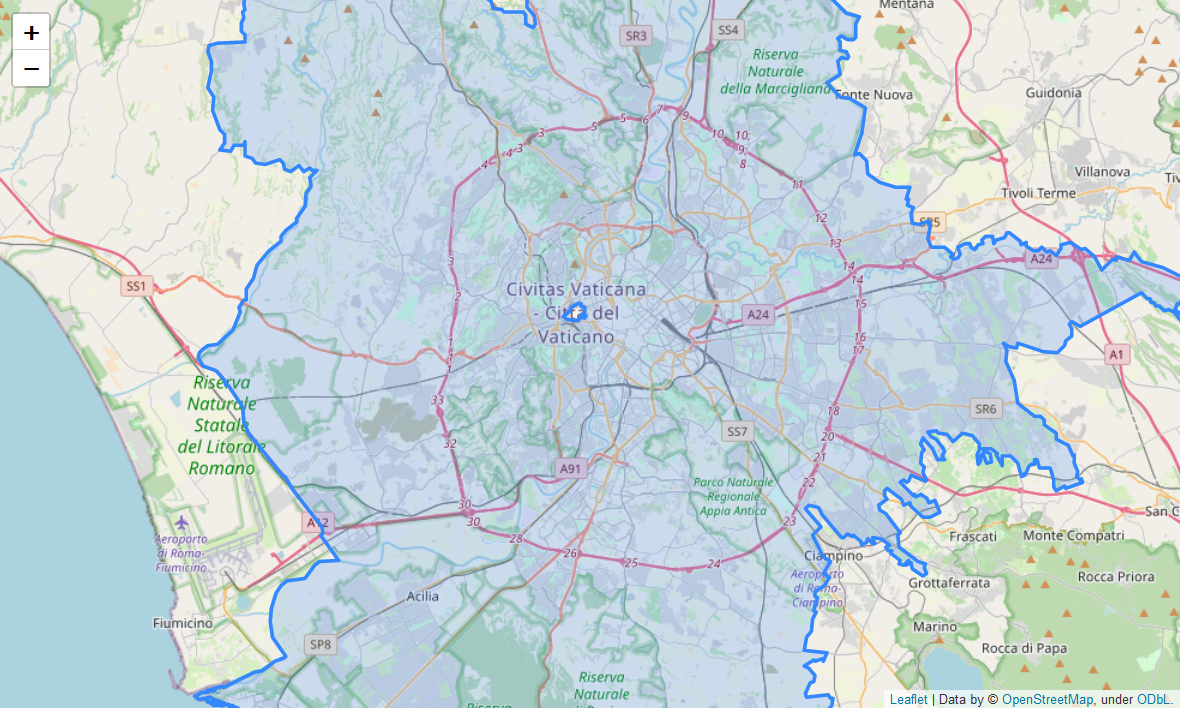

## Getting the Cinemas of Rome

In [5]:
tags = {'amenity': 'cinema'}
cinemas = ox.geometries_from_place(place, tags) #getting the cinemas of Rome from the tag

In [6]:
cinemas.loc[cinemas['name'].isna(),'name'] = 'Cinema Estivo Giardini N.Calipari' #adding the name at the only missing cinema

In [7]:
cinemas = cinemas.to_crs('+proj=cea') #to avoid the projection warning I used the equal area
cinemas.shape

(58, 56)

## Creating a Convex Hull to include all the Cinemas inside it

In [8]:
poly_ch = gpd.GeoDataFrame(geometry=[MultiPoint(cinemas.centroid).convex_hull], crs='+proj=cea')
poly_ch = poly_ch.to_crs('epsg:4326') #to avoid the projection warning I used the equal area

## Adding the Convex Hull to the map

In [9]:
folium.GeoJson(poly_ch, style_function=lambda x:{'fillColor': '#ff0000', 'lineColor': '#ff0000'}).add_to(map_f)

## Adding the popup markers with their names

In [10]:
#converting back the gdf to the standard to comput earth distances
cinemas = cinemas.to_crs('epsg:4326')
cinemas.head()

amenity                 name  \
element_type osmid                                    
node         248663946  cinema  Cineclub Alphaville   
             248674890  cinema         Nuovo Sacher   
             248676601  cinema                Reale   
             250884088  cinema             EUR Cine   
             250889369  cinema      Quattro Fontane   

                                         geometry addr:city addr:country  \
element_type osmid                                                         
node         248663946  POINT (12.53391 41.88741)       NaN          NaN   
             248674890  POINT (12.47267 41.88422)       NaN          NaN   
             248676601  POINT (12.47438 41.88932)      Roma           IT   
             250884088  POINT (12.46847 41.83388)       NaN          NaN   
             250889369  POINT (12.49199 41.90141)      Roma           IT   

                       addr:housenumber                addr:street  \
element_type osmid                                                   
node         248663946              NaN                        NaN   
             248674890              NaN                        NaN   
             248676601                3      Piazza Sidney Sonnino   
             250884088               32                  Via Liszt   
             250889369               23  Via delle Quattro Fontane   

                                 phone addr:postcode wheelchair  ...  \
element_type osmid                                               ...   
node         248663946             NaN           NaN        NaN  ...   
             248674890             NaN           NaN        NaN  ...   
             248676601  +39 06 5810234           NaN        NaN  ...   
             250884088             NaN         00144        NaN  ...   
             250889369             NaN         00184        yes  ...   

                       payment:visa_electron wikipedia building:levels  \
element_type osmid                                                       
node         248663946                   NaN       NaN             NaN   
             248674890                   NaN       NaN             NaN   
             248676601                   NaN       NaN             NaN   
             250884088                   NaN       NaN             NaN   
             250889369                   NaN       NaN             NaN   

                       roof:shape tourism opening_hours:signed roof:levels  \
element_type osmid                                                           
node         248663946        NaN     NaN                  NaN         NaN   
             248674890        NaN     NaN                  NaN         NaN   
             248676601        NaN     NaN                  NaN         NaN   
             250884088        NaN     NaN                  NaN         NaN   
             250889369        NaN     NaN                  NaN         NaN   

                       addr:housename ways type  
element_type osmid                               
node         248663946            NaN  NaN  NaN  
             248674890            NaN  NaN  NaN  
             248676601            NaN  NaN  NaN  
             250884088            NaN  NaN  NaN  
             250889369            NaN  NaN  NaN  

[5 rows x 56 columns]

In [11]:
for _, cinema in cinemas.iterrows():
    folium.Marker(flip_xy(cinema['geometry'].centroid), #the location of the marker
                  popup=cinema['name'], #its name
                  icon=folium.Icon(color='green') #the color of the icon
                 ).add_to(map_f)

In [12]:
cinemas.head()

amenity                 name  \
element_type osmid                                    
node         248663946  cinema  Cineclub Alphaville   
             248674890  cinema         Nuovo Sacher   
             248676601  cinema                Reale   
             250884088  cinema             EUR Cine   
             250889369  cinema      Quattro Fontane   

                                         geometry addr:city addr:country  \
element_type osmid                                                         
node         248663946  POINT (12.53391 41.88741)       NaN          NaN   
             248674890  POINT (12.47267 41.88422)       NaN          NaN   
             248676601  POINT (12.47438 41.88932)      Roma           IT   
             250884088  POINT (12.46847 41.83388)       NaN          NaN   
             250889369  POINT (12.49199 41.90141)      Roma           IT   

                       addr:housenumber                addr:street  \
element_type osmid                                                   
node         248663946              NaN                        NaN   
             248674890              NaN                        NaN   
             248676601                3      Piazza Sidney Sonnino   
             250884088               32                  Via Liszt   
             250889369               23  Via delle Quattro Fontane   

                                 phone addr:postcode wheelchair  ...  \
element_type osmid                                               ...   
node         248663946             NaN           NaN        NaN  ...   
             248674890             NaN           NaN        NaN  ...   
             248676601  +39 06 5810234           NaN        NaN  ...   
             250884088             NaN         00144        NaN  ...   
             250889369             NaN         00184        yes  ...   

                       payment:visa_electron wikipedia building:levels  \
element_type osmid                                                       
node         248663946                   NaN       NaN             NaN   
             248674890                   NaN       NaN             NaN   
             248676601                   NaN       NaN             NaN   
             250884088                   NaN       NaN             NaN   
             250889369                   NaN       NaN             NaN   

                       roof:shape tourism opening_hours:signed roof:levels  \
element_type osmid                                                           
node         248663946        NaN     NaN                  NaN         NaN   
             248674890        NaN     NaN                  NaN         NaN   
             248676601        NaN     NaN                  NaN         NaN   
             250884088        NaN     NaN                  NaN         NaN   
             250889369        NaN     NaN                  NaN         NaN   

                       addr:housename ways type  
element_type osmid                               
node         248663946            NaN  NaN  NaN  
             248674890            NaN  NaN  NaN  
             248676601            NaN  NaN  NaN  
             250884088            NaN  NaN  NaN  
             250889369            NaN  NaN  NaN  

[5 rows x 56 columns]

In [ ]:
# visualizing the current result
map_f

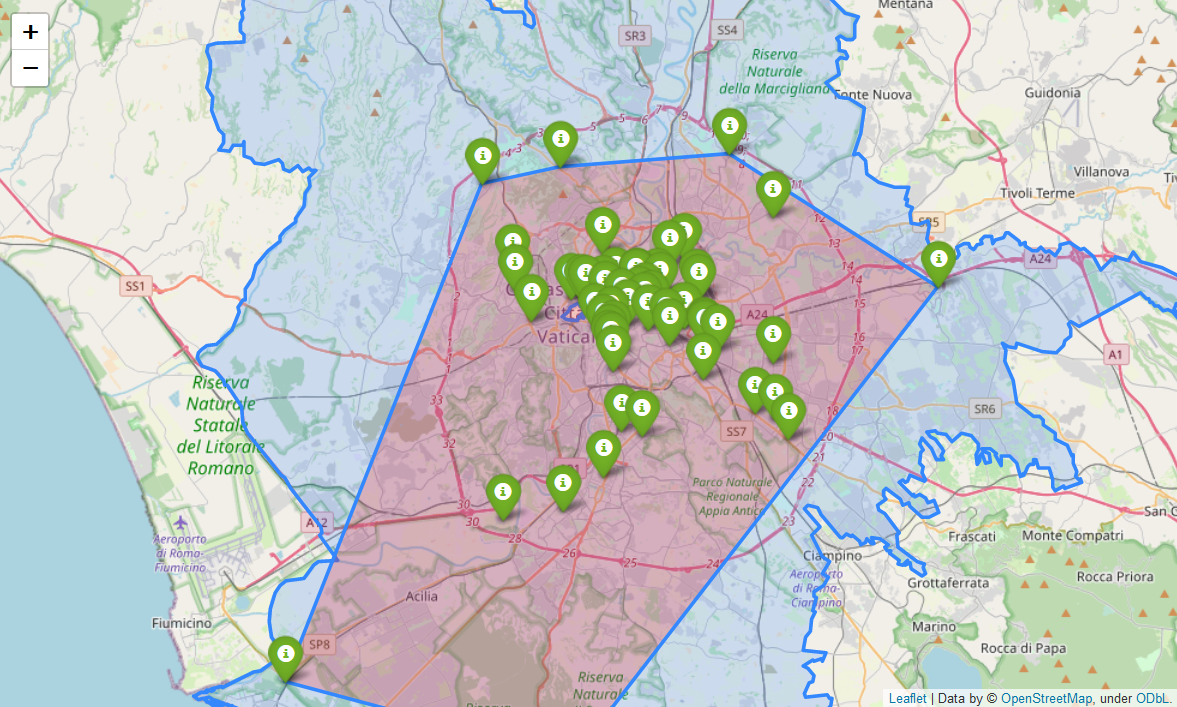

## Computing the Distances between each Cinema

In [14]:
#I already written this in a previous exercise (1.1 if I'm not wrong)

from math import cos, sin, asin, sqrt, pi, tan

def to_radians(*args): #I needed radians to work with trigonometry
    for raw in args:
        yield raw*(pi/180) #I made it a generator out of convenience

def haversine_formula(P, Q):
    latP, lonP = P
    latQ, lonQ = Q
    #converting the latitude and longitudes to radians
    latP, lonP, latQ, lonQ = tuple(to_radians(latP, lonP, latQ, lonQ))
    #print(latP, lonP, latQ, lonQ)

    earth_radius = 6371 #km, from wikipedia

    Dlat = latQ - latP
    Dlon = lonQ - lonP

    #I copied and translated the formula to python
    to_sqrt = sin(Dlat/2)**2 + cos(latP)*cos(latQ)*sin(Dlon/2)**2
    d = 2*earth_radius*asin(sqrt(to_sqrt))

    return  d

In [15]:
# looping through the row of the list of cinemas twice,
distances = list()
for _, cinema_1 in cinemas.iterrows():
    per_cinema = list()
    for _, cinema_2 in cinemas.iterrows():
        dist = haversine_formula(flip_xy(cinema_1['geometry'].centroid), 
                                 flip_xy(cinema_2['geometry'].centroid))
        per_cinema.append(dist)
    #adding to a list a tuple with the centroid/point in space, name of the cinema and its average distance from all others
    distances.append((cinema_1['name'], sum(per_cinema)/len(per_cinema), cinema_1['geometry'].centroid)) 

## Getting the min & max average distance

In [16]:
min_avg_dist = min(distances, key=lambda x: x[1])
min_avg_dist

('Quattro Fontane',
 4.544743928755392,
 <shapely.geometry.point.Point at 0x29cdddb7b20>)

In [17]:
max_avg_dist = max(distances, key=lambda x: x[1])
max_avg_dist

('Cineland',
 23.580575020981943,
 <shapely.geometry.point.Point at 0x29cdde25310>)

In [18]:
#creating a GeoDataFrame with both points and adding a column to describe them
min_max = gpd.GeoDataFrame([[min_avg_dist[0], 'Min. Avg. Distance {:.2f}km'.format(min_avg_dist[1])],
                            [max_avg_dist[0], 'Max. Avg. Distance {:.2f}km'.format(max_avg_dist[1])]], 
                           geometry=[min_avg_dist[2], max_avg_dist[2]], 
                           columns = ['name', 'description'])
min_max

name                 description                   geometry
0  Quattro Fontane   Min. Avg. Distance 4.54km  POINT (12.49199 41.90141)
1         Cineland  Max. Avg. Distance 23.58km  POINT (12.28691 41.74626)

## Final Result
The description of the distance is put only on the circle popup

In [19]:
for _, val in min_max.iterrows():
    #adding a new Icon over the previous one with a different color so that the 2 cinemas
    folium.Marker(flip_xy(val['geometry'].centroid), #the location of the marker
                  popup=val['name'], #its name
                  icon=folium.Icon(color='red') #the color red of the icon
                 ).add_to(map_f)
    
    #adding a circle of radius of 100m with the description around the cinema with min & max distance
    folium.Circle(flip_xy(val['geometry'].centroid), #the location of the marker
                  popup=val['description'], #its description
                  radius = 100, 
                  color='#ffff00', fill_color='#ffff00' #the color yellow of the circle
                 ).add_to(map_f)

In [ ]:
map_f

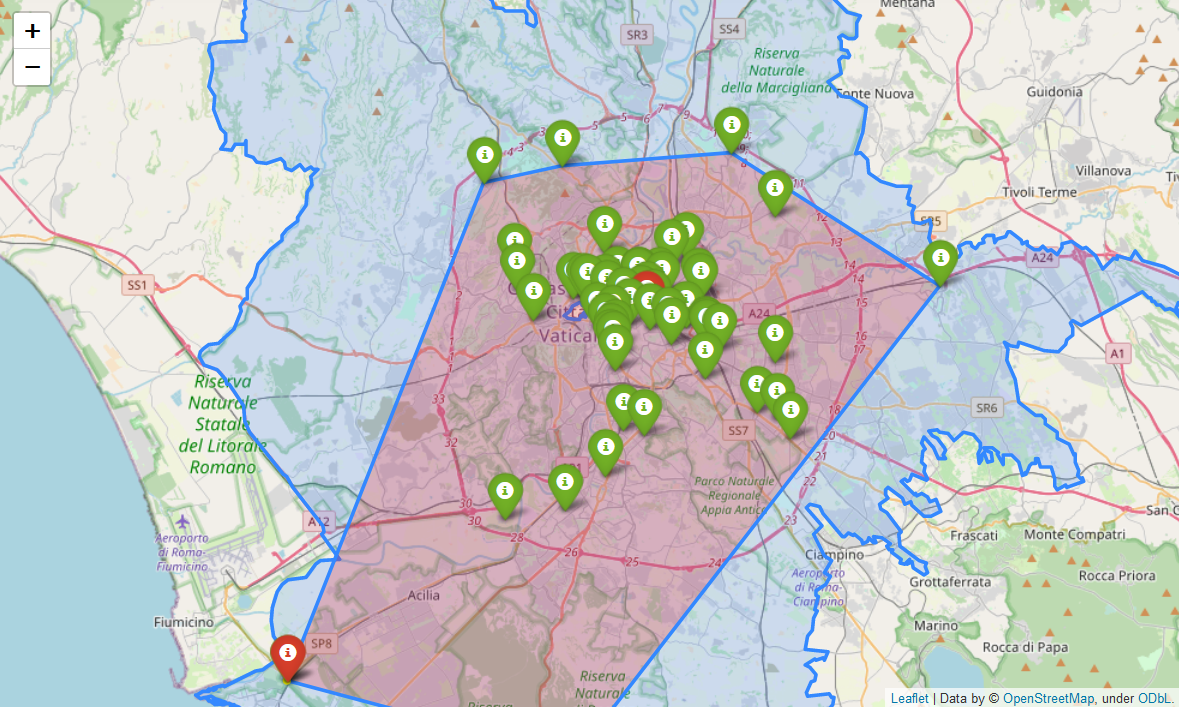